# Intro to PyTorch Hooks - Exercises and Coding Session

In this tutorial, you will learn to utilize PyTorch hooks. Since we discussed what a PyTorch hook is in the presentation part, we will use this time to dive into the coding aspect. 

The tutorial will be divided into the following three sections.

1. Forward pre-hook
2. Forward hook
3. Backward hook

In [88]:
%matplotlib inline
import typing as t

# Mathematical operations
import numpy as np

# visualization
import matplotlib.pyplot as plt

# PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F

# Default network for testing
class LinearModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc_1 = nn.Linear(10, 20)
        self.fc_2 = nn.Linear(20, 30)
        self.fc_3 = nn.Linear(30, 2)
        self.relu = lambda x: F.relu(x)

    def forward(self, input_tensor: torch.Tensor) -> torch.Tensor:
        first_output = self.fc_1(input_tensor)
        second_output = self.fc_2(first_output)
        third_output = self.fc_3(second_output)
        final_output = self.relu(third_output)
        return final_output

    
def get_pyplot_figure_for_batch(output_array: torch.Tensor) -> plt.figure:
    """
    Just use this to visualize the output of each layer
    """
    # Get the shape of the output tensor
    output_shape = output_array.shape    
    fig = plt.figure(figsize=(16, 16))
    for i in range(output_shape[2]):
        ax = fig.add_subplot(output_shape[2]//8 + 1, 8, i+1)
        if output_shape[2] == 1: # If only one channel, skip the last axis
            ax.imshow(output_array[:,:,0], cmap='gray', interpolation='nearest')
            ax.imshow(np.dstack((output_array[:,:,0], output_array[:,:,0], output_array[:,:,0])))
        else:
            ax.imshow(output_array[:,:,i], cmap='jet', interpolation='nearest')
            ax.imshow(np.dstack((output_array[:,:,i], output_array[:,:,i], output_array[:,:,i])))
        ax.axis('off')
    return fig


## 1. Forward pre-hook

Forward pre-hooks are used to debug / pre-process inputs into a `nn.Module`. Below is a demo on how to use the foward pre_hook.


In [108]:
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(10, 5)
        self.fc2 = nn.Linear(5, 1)
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        print('Before fc_1 forward')
        x = self.fc1(x)
        print('After fc_1 forward')
        x = torch.relu(x)
        x = self.fc2(x)
        return x

# Define a forward pre_hook function that prints the input and output of the first layer
def print_input_output(module: nn.Module, input_tuple: t.Tuple[torch.Tensor, ...]):
    print(f'Module: {module}')
    print(f'Input: {input_tuple[0]}')

# Create an instance of the neural network and register the forward pre_hook
net = SimpleNet()
net.fc1.register_forward_pre_hook(print_input_output)

# Create some input data to pass through the network
x = torch.randn(1, 10)

# Pass the input data through the network
output = net(x)
output

Before fc_1 forward
Module: Linear(in_features=10, out_features=5, bias=True)
Input: tensor([[ 1.5969, -0.8364, -0.9018,  1.5959, -1.5995, -0.8203, -1.9888, -1.3835,
         -0.2255,  0.3006]])
After fc_1 forward


tensor([[0.2290]], grad_fn=<AddmmBackward0>)

### Exercise 1.1

Given the `LinearModel` in the earlier section, using the PyTorch forward pre-hook.

1. Define an instance of `LinearModel`
2. Add a forward pre_hook to `fc_1` and `fc_3`that prints out the original input and the tensor shape.
3. Afterwards, try passing in a random tensor created using `torch.randn` or your function of choice and check whether the hook is working as intended.
4. Lastly, try removing the hook attached to `fc_3`. 
5. Afterwards, try passing in a random tensor created using `torch.randn` or your function of choice and check whether the hook to `fc_3` has been successfully removed.

In [89]:
# Write your code for Exercise 1.1 here 
# -----------------------------------


### Exercise 1.2 

Right now, there is no way to add hooks onto the relu activation, because the `ReLU` activation is not implemented. 
The goal of this exercise is to

1. Update the neural network so that we can add the forward pre-hook to the `ReLU` operation in the neural network above.
2. Create a random input tensor
3. Feed that random input tensor to the neural network and print the outputs
4. Add a forward hook to the `ReLU` layer. It should add 1.5 to each of the entries to the `ReLU` activation.
5. Feed the random input tensor from step 2
6. Afterwards, compare the output from the current step with the output from the third step. There should be a `1.5` value difference between the two.


In [91]:
# Write your code for Exercise 1.2 here 
# -----------------------------------

# 1. TODO
class LinearModel(nn.Module):
    # TODO: re-implement neural network so that we can add hooks to the ReLU operation.
    pass

# 2. Create random input tensor

# 3. Feed the random input tensor to Neural network

# Carry on ...

## 2. Forward Hook

Forward hooks are used for debugging the forward pass of a `nn.Module`. It is a useful tool to check that each operation inside of your neural network is outputting expected values. 

It is also useful for visualizing and tracking the outputs of a neural network over time during the training phase, which can be very useful for debugging the training code.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1, 3, 224, 224]), output_tensors: torch.Size([64, 112, 112])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

[[ 9.3681216e-02  6.1845988e-01  2.4712010e-06 ...  2.5044034e+00
  -8.2446314e-02  6.7185235e-01]
 [ 1.0103518e-01 -3.2744598e-01  4.8355846e-06 ...  3.1468310e+00
  -1.3759789e+00 -4.5600078e-01]
 [ 1.5231840e-01 -5.0744212e-01  5.7251850e-06 ...  2.7217395e+00
  -1.5584096e+00 -1.9525436e-01]
 ...
 [ 1.1051458e-01 -6.3116461e-01  3.8723842e-06 ...  2.2010679e+00
  -1.0353060e+00 -1.9381604e-01]
 [ 1.1153961e-01 -6.3857120e-01  3.7921022e-06 ...  2.2136145e+00
  -1.0161806e+00 -1.5870801e-01]
 [ 9.3211897e-02 -1.2067878e+00  3.1143884e-06 ...  1.9796704e+00
  -1.3922985e+00 -3.9453480e-01]]


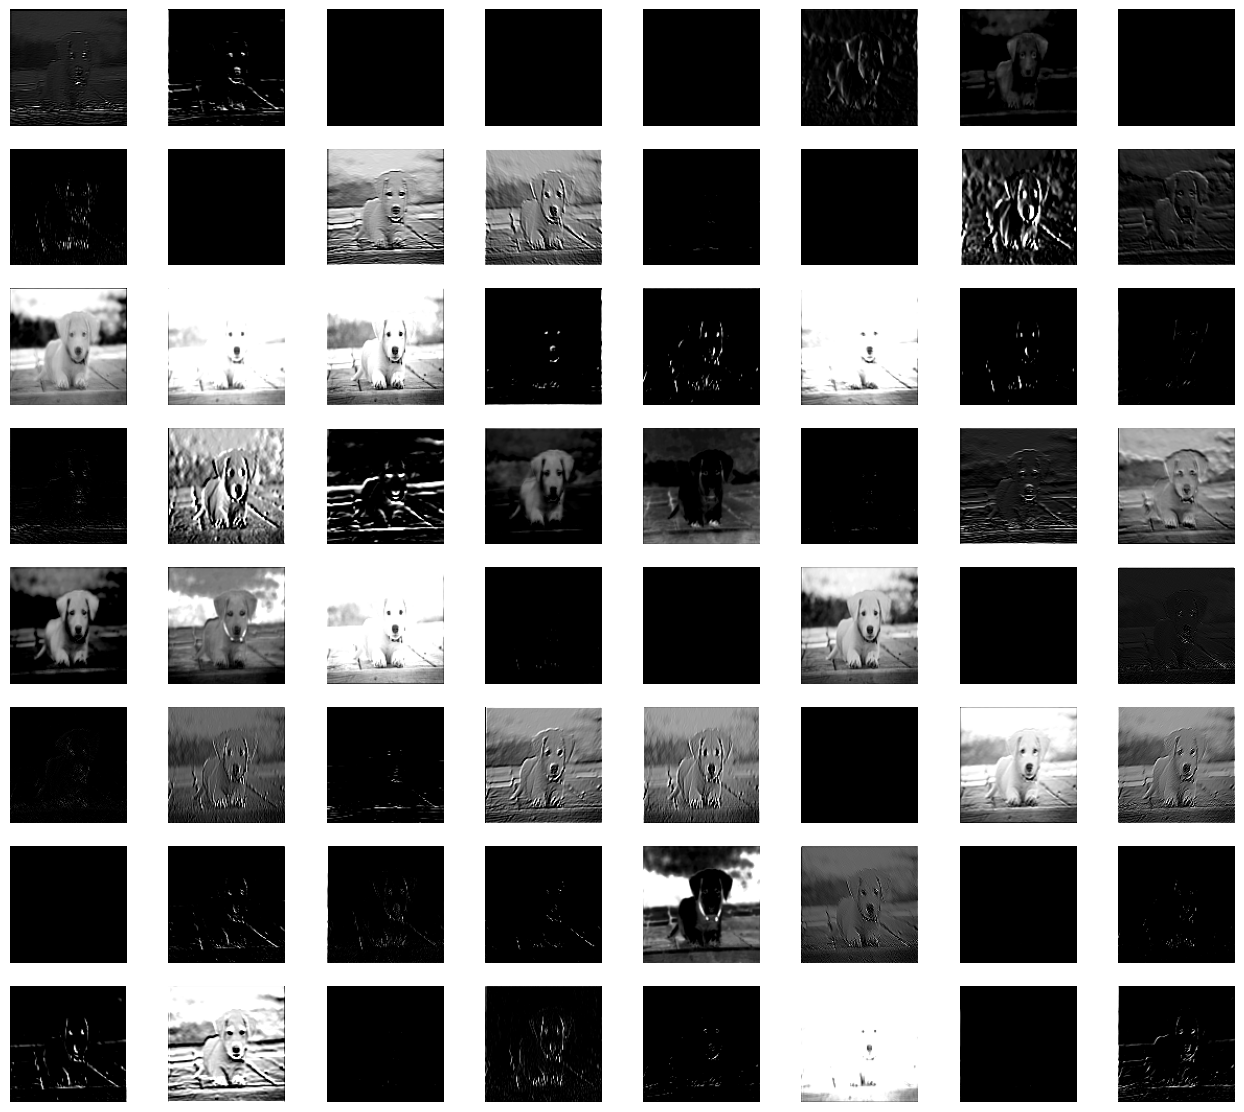

In [101]:
from PIL import Image
import torch
from torchvision.models import resnet18
from torchvision import transforms as T

# The starter code is copied from 
# https://web.stanford.edu/~nanbhas/blog/forward-hooks-pytorch/
# Please do not look at the sample code above before attempting this exercise and only 
# refer to it if you have are stuck

# To see what the decimal numbers are close to
torch.set_printoptions(sci_mode=False)


# input (single)
image = Image.open('puppy.jpg')
transform = T.Compose([T.Resize((224, 224)), T.ToTensor()])
# Unsqueeze to add batch dimension
image_tensor = transform(image).unsqueeze(dim=0)

# original model
# we want to set 
model = resnet18(pretrained=True)


def some_forward_hook(module: nn.Module, 
                      input_tensors: t.Tuple[torch.Tensor, ...], 
                      output_tensors: t.Tuple[torch.Tensor, ...]):
    # Okay, some convolution is taking place ... 
    print(f'{input_tensors[0].shape}, output_tensors: {output_tensors[0].shape}')
    
    # Get the shape of the output tensor
    output_shape = output_tensors[0].shape
    
    # Transpose the tensor to shape [C, H, W]
    output_array = output_tensors[0].detach().cpu().numpy().transpose(1, 2, 0)
    
    # Create a figure and plot the feature maps
    # You don't need to understand this code, as it is purely for visualization purposes.
    fig = get_pyplot_figure_for_batch(output_array)
        
    fig.savefig(f'feature_maps_{output_shape}.png')
    # Show the figure inline
    plt.show()


# Check the outputs of a layer by adding hooks
hook_handle = model.conv1.register_forward_hook(some_forward_hook)

# Hooks are called during the forward pass
output = model(image_tensor)

### Exercise 2.1

Perform the following steps

1. Using the `LinearModel`, try add a foward_hook to the relu layer.
2. Double the output of the relu layer 
3. Log and verify the results
4. Afterwards remove the hook and do a forward pass to ensure that it is working properly

In [4]:
# Write your code for Exercise 2.1 here 
# -----------------------------------


### Exercise 2.2

The goal is to perform the following steps.

1. Analyze the `resnet18` 's modules. 
   1. Try looking at `.modules()`
2. After asssessing the network structure and module names, find a way to filter out all the modules that output convolutional feature maps
3. Add a forward hook to each of these convolutional modules so that we
   1. Visualize the first `four` convolutional layers using `matplotlib`
4. Feed the dog image into the neural network. You can also feel free to grab other images from the internet to test with.
5. Lastly, remove all the hooks registered to the neural network
6. Try feeding the dog image again to check that the forward hooks have properly been detached.

In [119]:
from PIL import Image
import torch
from torchvision.models import resnet18
from torchvision import transforms as T

# The starter code is copied from 
# https://web.stanford.edu/~nanbhas/blog/forward-hooks-pytorch/
# Please do not look at the sample code above before attempting this exercise and only 
# refer to it if you have are stuck

# input (single)
image = Image.open('puppy.jpg')
transform = T.Compose([T.Resize((224, 224)), T.ToTensor()])
input_image = transform(image).unsqueeze(dim=0)

# original model
model = resnet18(pretrained=True)

# Write your code for Exercise 2.2 here 
# -----------------------------------

## 3. Backward Hooks

Backward hooks are used to visualize and debug gradients. It can be very useful to check whether there are vanishing / exploding gradients during training. Such bugs are very difficult to find without proper logging / visualization.

In [130]:
v = torch.tensor([0., 0., 0.], requires_grad=True)
h = v.register_hook(lambda grad: grad * 2)  # double the gradient
v.backward(torch.tensor([1., 2., 3.]))
v.grad

tensor([2., 4., 6.])

Backwards hooks can only be attached on tensors and modules that accumulate gradients. For example, the following operation below will not work. 

In [131]:
# Does not work if requires_grad = False
v = torch.tensor([0., 0., 0.], requires_grad=False)
h = v.register_hook(lambda grad: grad * 2)  # double the gradient
v.backward(torch.tensor([1., 2., 3.]))
v.grad

RuntimeError: cannot register a hook on a tensor that doesn't require gradient

### Exercise 3.1

One very useful technique when training neural networks is a technique called "Gradient Clipping". 
It is a very useful techique to prevent exploding gradients when training neural networks. 
Exploding gradients are a very common issue when training Recurrent neural network, due to the 
backpropagation through time technique. 

An example of Gradient clipping is something like the following:

"If the gradient becomes greater than 10, set it to 10".

Gradient clipping can be implemented using PyTorch backward hooks (there is also a function for it, but assume that it doesn't exist). 

Your goal is to implement gradient clipping in the exercise and to check the gradient values to ensure that it is working correctly. 
Use the previous network (`resnet18`) from the previous exercise and try feeding the dog image.

1. Write a backward hook that clips gradients that are greater than `gradient_threshold` where, the value `gradient_threshold` is a variable. Feel free to use either ResNet18 or a simple model of your choice.
2. Visualize the gradient via printing onto the console
   1. If you are feeling adventurous, try logging the results onto TensorBoard (not that difficult)
3. Check the gradients to ensure that the gradients are being properly clipped. 
   1. Try setting the threshold to various values and experiment with your implementation.

Leverage the given neural network and model to work with the value.

Forward: ouput_shape: torch.Size([20])
Forward: ouput_shape: torch.Size([30])
Forward: ouput_shape: torch.Size([2])
Backward input gradient -- shape: torch.Size([2])
Backward input gradient -- shape: torch.Size([10, 30])
Backward input gradient -- shape: torch.Size([30, 2])
Backward output gradient -- shape: torch.Size([10, 2])
Backward input gradient -- shape: torch.Size([30])
Backward input gradient -- shape: torch.Size([10, 20])
Backward input gradient -- shape: torch.Size([20, 30])
Backward output gradient -- shape: torch.Size([10, 30])
Backward input gradient -- shape: torch.Size([20])
Backward input gradient -- Not a leaf node. Only leaf nodes accumulate gradients
Backward input gradient -- shape: torch.Size([10, 20])
Backward output gradient -- shape: torch.Size([10, 20])


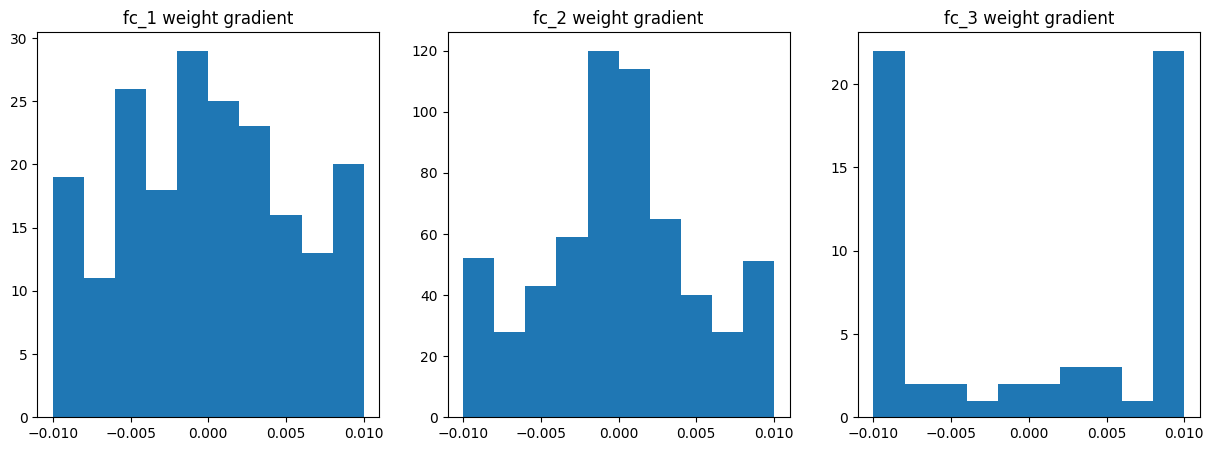

In [129]:
# Default network for testing
class LinearModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc_1 = nn.Linear(10, 20)
        self.fc_2 = nn.Linear(20, 30)
        self.fc_3 = nn.Linear(30, 2)
        self.relu = nn.ReLU()

    def forward(self, input_tensor: torch.Tensor) -> torch.Tensor:
        first_output = self.fc_1(input_tensor)
        second_output = self.fc_2(first_output)
        third_output = self.fc_3(second_output)
        final_output = self.relu(third_output)
        return final_output

# Define a backward hook to clip the gradients
def clip_grads(module: nn.Module, 
               grad_in: t.Tuple[torch.Tensor, ...], 
               grad_out: t.Tuple[torch.Tensor, ...]):
    gradient_threshold = 0.01
    for grad in grad_in:
        if grad is not None:
            print(f'Backward input gradient -- shape: {grad.shape}')
            clipped_grad = torch.clamp(grad, -gradient_threshold, gradient_threshold)
            grad.copy_(clipped_grad)
        else:
            print('Backward input gradient -- Not a leaf node. Only leaf nodes accumulate gradients')
    
    # Output gradients
    # For more information on how these are calculated, try reading up on autograd
    # Essentially, we do a dot product with the transpose of the 
    # Jaocbian vector matrix x vector of gradients from a scalar function (think CE loss or MSE)
    # Think of the second element in shape as the size of the previous layer (DL / D_theta_0, theta_1, ... theta_n) = 
    # Jacobian
    for grad in grad_out:
        if grad is not None:
            print(f'Backward output gradient -- shape: {grad.shape}')
        else:
            print('Backward output gradient -- Not a leaf node. Only leaf nodes accumulate gradients')
        


def forward_hook(module, input, output):
    print(f'Forward: ouput_shape: {output[0].shape}')

# Generate some input and target tensors for testing
batch_size = 10
input_tensor = torch.randn((batch_size, 10))
target_tensor = torch.tensor([0, 1])
target_tensor = target_tensor.repeat(5)  # repeat the target tensor to match the batch size

# Initialize the model and loss function
model = LinearModel()
loss_function = nn.CrossEntropyLoss()

# Attach backward hooks to the linear layers
model.fc_1.register_backward_hook(clip_grads)
model.fc_2.register_backward_hook(clip_grads)
model.fc_3.register_backward_hook(clip_grads)

model.fc_1.register_forward_hook(forward_hook)
model.fc_2.register_forward_hook(forward_hook)
model.fc_3.register_forward_hook(forward_hook)

# Forward pass
output_tensor = model(input_tensor)
loss = loss_function(output_tensor, target_tensor)

# Backward pass
model.zero_grad()
# This will trigger all the backward hooks
loss.backward()

# Visualize the gradients
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].hist(model.fc_1.weight.grad.flatten())
axs[0].set_title('fc_1 weight gradient')
axs[1].hist(model.fc_2.weight.grad.flatten())
axs[1].set_title('fc_2 weight gradient')
axs[2].hist(model.fc_3.weight.grad.flatten())
axs[2].set_title('fc_3 weight gradient')
plt.show()